<a href="https://colab.research.google.com/github/beilak/qdev/blob/main/Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit['optimaze'] -q
!pip install qiskit_ibm_provider -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

### TOKEN

# Grover Algo

In [3]:
from qiskit import QuantumCircuit

init = QuantumCircuit(3)
init.h([0, 1, 2])
init.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [5]:
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import GroverOperator


good_state = "010"
oracle = Statevector.from_label(good_state)
grover_operator = GroverOperator(oracle)

In [6]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

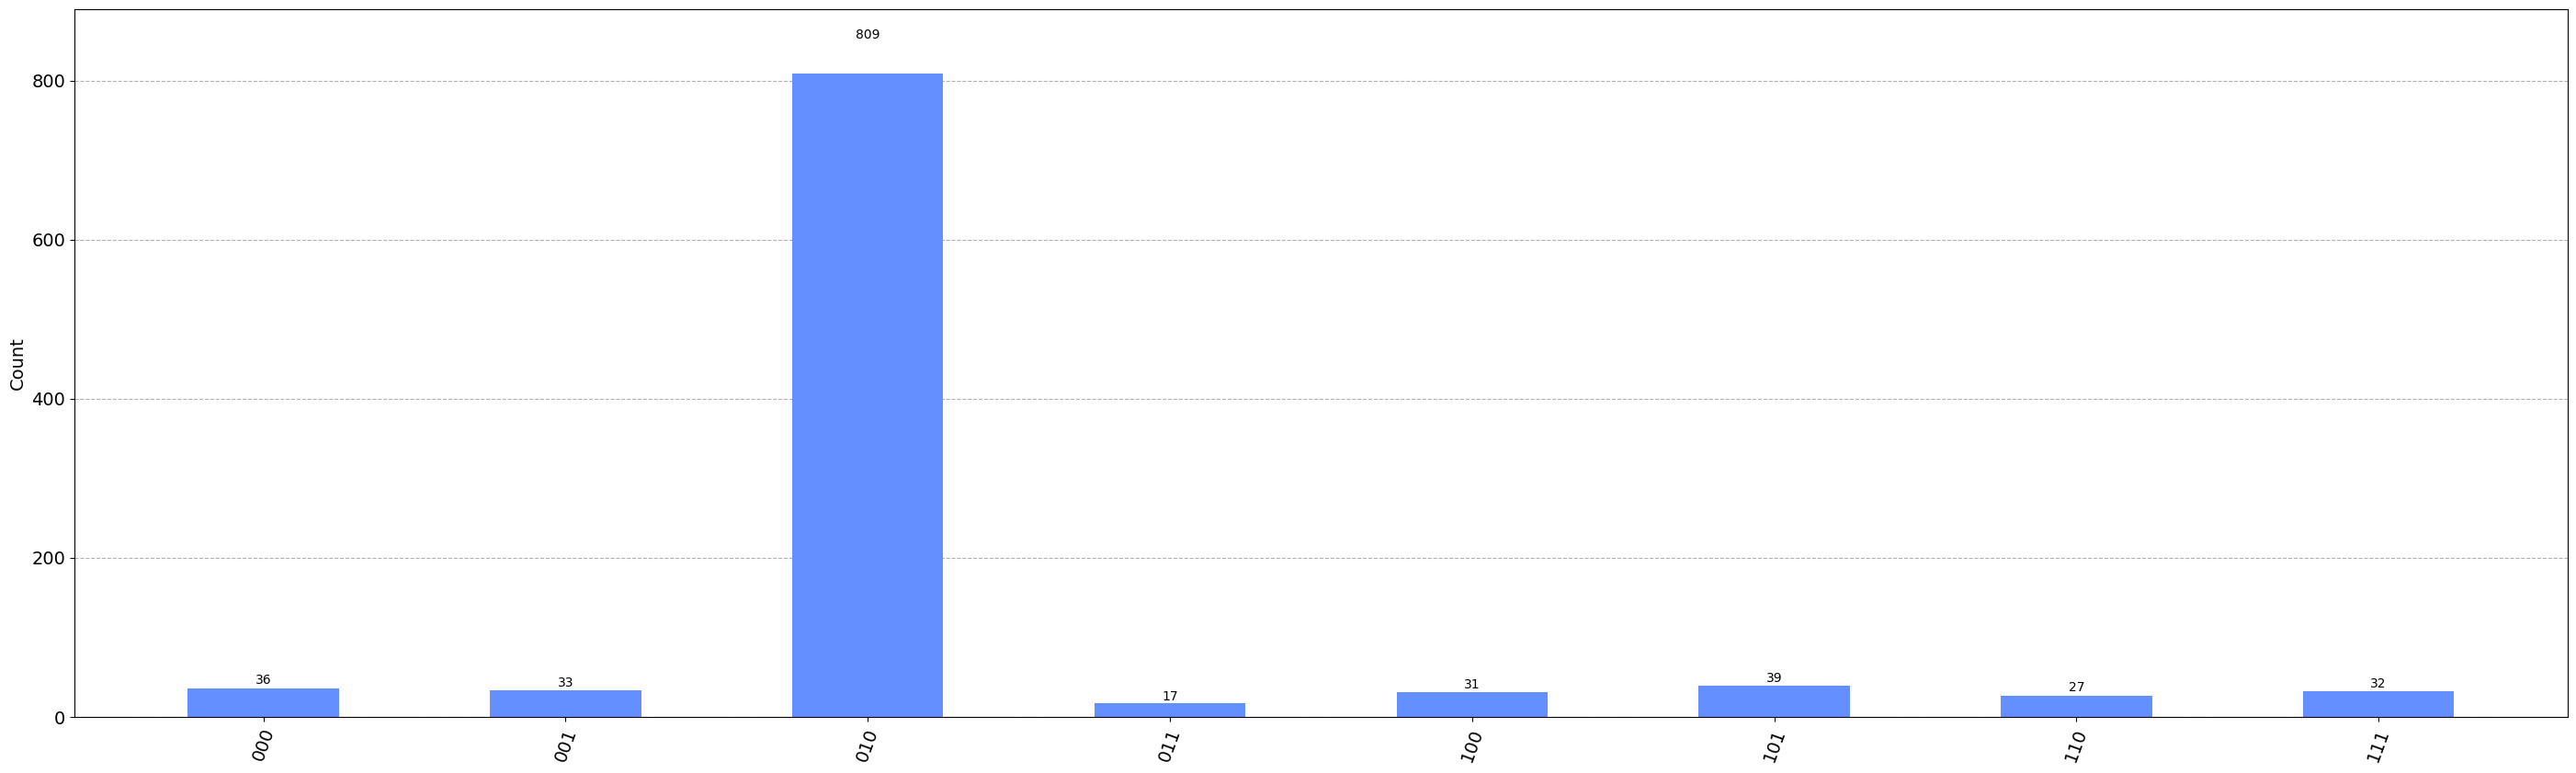

In [7]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram


sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

plot_histogram(counts, figsize=(35, 10))

### Connect to QUANTUM COMPUTER.

In [16]:
# # Connect to QUANTUM COMPUTER.
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider.ibm_backend import IBMBackend
from qiskit_ibm_provider import least_busy

print(f"Looking for Backend")
provider: IBMProvider = IBMProvider(token=TOKEN)
backend: IBMBackend = least_busy(provider.backends(
                filters=lambda x: x.configuration().n_qubits >= 3
                                  and not x.configuration().simulator
                                  and x.status().operational == True),
                                 )
print(backend)

Looking for Backend
<IBMBackend('ibmq_manila')>


In [17]:
transpiled_qc: QuantumCircuit = transpile(qc, backend, optimization_level=3)
print(f"Running QC....")
job = backend.run(
    transpiled_qc,
    # qc,
    job_tags=["Grover", "0010"],
    shots=1024,
)
print(f"DONE")


Running QC....
DONE
